In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the pollution_dataset
traffic_data = pd.read_csv("traffic-volume-survey.csv")


In [4]:
traffic_data.head()

,geo_point_2d,geo_shape,latitude,longitude,road_name,installed_year,range,type,date,easting,...,projection,postcode,pc85th_kmh,volume_12h,volume_24h,comm_vhcl,peakvol,suburb_name,ward_name,gisfid
0,"-38.1216300043, 145.2924700205","{""coordinates"": [145.2924700205, -38.121630004...",-38.121630,145.292470,ANNABELLA STREET,2022,Between 50km/h and 60km/h,W,2022-08-24,350326,...,MGA2020 zone 55,3977,50.5,546,658,3.15,10.27,CRANBOURNE EAST,BALLA BALLA,506
1,"-38.0790430044, 145.3301540239","{""coordinates"": [145.3301540239, -38.079043004...",-38.079043,145.330154,ALISMA BOULEVARD,2022,Between 50km/h and 60km/h,W,2022-08-24,353544,...,MGA2020 zone 55,3977,56.8,2790,3708,2.72,10.85,CRANBOURNE NORTH,SPRINGFIELD,514
2,"-38.0973230017, 145.2458930241","{""coordinates"": [145.2458930241, -38.097323001...",-38.097323,145.245893,QUARTERS BOULEVARD,2022,Less than 30km/h,W,2022-08-24,346192,...,MGA2020 zone 55,3977,27.0,368,402,3.24,16.79,CRANBOURNE WEST,MAYFIELD,517
3,"-37.9748000045, 145.2722920164","{""coordinates"": [145.2722920164, -37.974800004...",-37.974800,145.272292,HANNA DRIVE,2022,Between 50km/h and 60km/h,W,2022-08-24,348254,...,MGA2020 zone 55,3802,54.2,3661,4293,6.00,21.70,ENDEAVOUR HILLS,FOUR OAKS,520
4,"-38.0443360031, 145.2755090228","{""coordinates"": [145.2755090228, -38.044336003...",-38.044336,145.275509,CORAL DRIVE,2022,Between 50km/h and 60km/h,W,2022-08-24,348680,...,MGA2020 zone 55,3976,50.0,3244,4017,4.39,11.94,HAMPTON PARK,RIVER GUM,524


In [5]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   geo_point_2d    1319 non-null   object 
 1   geo_shape       1319 non-null   object 
 2   latitude        1319 non-null   float64
 3   longitude       1319 non-null   float64
 4   road_name       1319 non-null   object 
 5   installed_year  1319 non-null   int64  
 6   range           1319 non-null   object 
 7   type            1319 non-null   object 
 8   date            1319 non-null   object 
 9   easting         1319 non-null   int64  
 10  northing        1319 non-null   int64  
 11  projection      1319 non-null   object 
 12  postcode        1319 non-null   int64  
 13  pc85th_kmh      1319 non-null   float64
 14  volume_12h      1319 non-null   int64  
 15  volume_24h      1319 non-null   int64  
 16  comm_vhcl       1319 non-null   float64
 17  peakvol         1319 non-null   f

1. geo_point_2d: Geographical coordinates of the data point in the format (latitude, longitude).
2. geo_shape: Geometry information in GeoJSON format, including coordinates and geometry type.
3. latitude: Latitude coordinate of the data point.
4. longitude: Longitude coordinate of the data point.
5. road_name: Name of the road associated with the data point.
6. installed_year: Year when a certain feature was installed (e.g., road infrastructure or signage).
7. range: Speed range associated with the road segment (e.g., "Between 50km/h and 60km/h").
8. type: Road type or classification (e.g., "W" for "West").
9. date: Date associated with the data point, indicating data collection or another event.
10. easting: Easting coordinate component in a specific coordinate reference system.
11. northing: Northing coordinate component in a specific coordinate reference system.
12. projection: Coordinate projection system used for the data.
13. postcode: Postal code information associated with the data point.
14. pc85th_kmh: 85th percentile speed (speed at or below which 85% of observed speeds fall) in kilometers per hour.
15. volume_12h: Volume of traffic observed over a 12-hour period.
16. volume_24h: Volume of traffic observed over a 24-hour period.
17. comm_vhcl: Number of commercial vehicles observed.
18. peakvol: Peak volume of traffic observed.
19. suburb_name: Name of the suburb associated with the data point.
20. ward_name: Name of the ward associated with the data point.
21. gisfid: Unique identifier for each data point.

In [6]:
traffic_data.describe()

,latitude,longitude,installed_year,easting,northing,postcode,pc85th_kmh,volume_12h,volume_24h,comm_vhcl,peakvol,gisfid
count,1319.000000,1319.000000,1319.000000,1319.000000,1.319000e+03,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,-38.066795,145.299181,2020.812737,350802.561789,5.785409e+06,3875.510235,51.968302,2038.299469,2584.727066,6.465360,38.900394,660.000000
std,0.054116,0.037674,1.854484,3321.597179,5.997133e+03,158.697572,10.791928,2529.950321,3258.954428,5.277923,145.615733,380.906813
min,-38.225106,145.226599,2018.000000,344695.000000,5.767858e+06,3156.000000,15.000000,0.000000,11.000000,0.000000,1.160000,1.000000
25%,-38.102350,145.265858,2019.000000,347870.500000,5.781410e+06,3805.000000,46.250000,380.500000,489.000000,3.390000,9.785000,330.500000
50%,-38.067303,145.298021,2021.000000,350701.000000,5.785355e+06,3975.000000,51.800000,1096.000000,1398.000000,4.880000,11.140000,660.000000
75%,-38.029082,145.329194,2022.000000,353396.500000,5.789626e+06,3977.000000,57.000000,2676.000000,3322.500000,7.500000,13.935000,989.500000
max,-37.950574,145.412960,2024.000000,361050.000000,5.798223e+06,3981.000000,102.000000,28264.000000,39101.000000,42.200000,2978.000000,1319.000000


In [7]:
# Check for missing values
missing_values = traffic_data.isnull().sum()
missing_values

geo_point_2d      0
geo_shape         0
latitude          0
longitude         0
road_name         0
installed_year    0
range             0
type              0
date              0
easting           0
northing          0
projection        0
postcode          0
pc85th_kmh        0
volume_12h        0
volume_24h        0
comm_vhcl         0
peakvol           0
suburb_name       0
ward_name         4
gisfid            0
dtype: int64

In [8]:
from datetime import datetime

# Convert the 'date' column to datetime
traffic_data['date'] = pd.to_datetime(traffic_data['date'])

# Extracting additional time-based features
traffic_data['day_of_week'] = traffic_data['date'].dt.day_name()
traffic_data['month'] = traffic_data['date'].dt.month
traffic_data['year'] = traffic_data['date'].dt.year

# Displaying the updated DataFrame with new columns
updated_data_head = traffic_data.head()

updated_data_head

,geo_point_2d,geo_shape,latitude,longitude,road_name,installed_year,range,type,date,easting,...,volume_12h,volume_24h,comm_vhcl,peakvol,suburb_name,ward_name,gisfid,day_of_week,month,year
0,"-38.1216300043, 145.2924700205","{""coordinates"": [145.2924700205, -38.121630004...",-38.121630,145.292470,ANNABELLA STREET,2022,Between 50km/h and 60km/h,W,2022-08-24,350326,...,546,658,3.15,10.27,CRANBOURNE EAST,BALLA BALLA,506,Wednesday,8,2022
1,"-38.0790430044, 145.3301540239","{""coordinates"": [145.3301540239, -38.079043004...",-38.079043,145.330154,ALISMA BOULEVARD,2022,Between 50km/h and 60km/h,W,2022-08-24,353544,...,2790,3708,2.72,10.85,CRANBOURNE NORTH,SPRINGFIELD,514,Wednesday,8,2022
2,"-38.0973230017, 145.2458930241","{""coordinates"": [145.2458930241, -38.097323001...",-38.097323,145.245893,QUARTERS BOULEVARD,2022,Less than 30km/h,W,2022-08-24,346192,...,368,402,3.24,16.79,CRANBOURNE WEST,MAYFIELD,517,Wednesday,8,2022
3,"-37.9748000045, 145.2722920164","{""coordinates"": [145.2722920164, -37.974800004...",-37.974800,145.272292,HANNA DRIVE,2022,Between 50km/h and 60km/h,W,2022-08-24,348254,...,3661,4293,6.00,21.70,ENDEAVOUR HILLS,FOUR OAKS,520,Wednesday,8,2022
4,"-38.0443360031, 145.2755090228","{""coordinates"": [145.2755090228, -38.044336003...",-38.044336,145.275509,CORAL DRIVE,2022,Between 50km/h and 60km/h,W,2022-08-24,348680,...,3244,4017,4.39,11.94,HAMPTON PARK,RIVER GUM,524,Wednesday,8,2022


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Features to be one-hot encoded
categorical_features = ['road_name', 'day_of_week', 'suburb_name', 'ward_name', 'range', 'type']

# Continuous features to be used as they are
continuous_features = ['latitude', 'longitude', 'month', 'year', 'comm_vhcl', 'peakvol']

# Combining categorical and continuous features
features = categorical_features + continuous_features

# Target variable
target = 'volume_24h'

<h1>classification</h1>

In [10]:
# Calculate the tertiles for the 'volume_24h' to define 'Low', 'Medium', 'High' traffic
traffic_data['traffic_category'] = pd.qcut(traffic_data['volume_24h'], 3, labels=["Low", "Medium", "High"])

# Checking how the categories are distributed
category_distribution = traffic_data['traffic_category'].value_counts()

# Preparing the data for modeling
# Selecting the previously defined features plus the new 'traffic_category'
features_classification = continuous_features + ['day_of_week', 'month', 'year']  
X_classification = traffic_data[features_classification]
y_classification = traffic_data['traffic_category']

# Encoding the categorical 'day_of_week' feature
X_classification = pd.get_dummies(X_classification, columns=['day_of_week'])

# Splitting the data into training and test sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_classification,
    y_classification,
    test_size=0.2,   # 20% of the data is used for the test set
    random_state=0  
)

category_distribution

traffic_category
Low       440
High      440
Medium    439
Name: count, dtype: int64

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Creating the Random Forest Classifier model
rf_classifier = RandomForestClassifier(random_state=0)

# Training the model on the training data
rf_classifier.fit(X_train_class, y_train_class)

# Predicting on the test data
y_pred_class = rf_classifier.predict(X_test_class)

# Evaluating the model using classification report (precision, recall, f1-score, accuracy)
classification_metrics = classification_report(y_test_class, y_pred_class)

print(classification_metrics)

              precision    recall  f1-score   support

        High       0.64      0.61      0.62        87
         Low       0.60      0.63      0.61        87
      Medium       0.52      0.51      0.51        90

    accuracy                           0.58       264
   macro avg       0.58      0.58      0.58       264
weighted avg       0.58      0.58      0.58       264



# TO WORK ON

here we can implement optimization algorithms to improve accuracy. and learn how to improve model.


Switching to a Support Vector Machine (SVM) model can be a good choice for the classification task, as SVMs are effective in finding the optimal boundary between different classes. They work well for both linear and non-linear classification, thanks to the use of kernel tricks.

<h1>Regression</h1>

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Convert 'date' to datetime and extract components
traffic_data['date'] = pd.to_datetime(traffic_data['date'], errors='coerce')
traffic_data['year'] = traffic_data['date'].dt.year
traffic_data['month'] = traffic_data['date'].dt.month
traffic_data['day_of_week'] = traffic_data['date'].dt.dayofweek

# Preprocess the data
# Handling categorical variables
le = LabelEncoder()
categorical_columns = ['road_name', 'range', 'type', 'suburb_name', 'ward_name']
for col in categorical_columns:
    traffic_data[col] = le.fit_transform(traffic_data[col].astype(str))

# Selecting features and target variable
features = traffic_data[['latitude', 'longitude', 'installed_year', 'road_name', 'range', 'type', 'suburb_name', 'ward_name', 'year', 'month', 'day_of_week']]
target = traffic_data['volume_24h']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Training the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(5551638.628973107, 0.4562503953012649)

# TO WORK ON

Given the complex relationships that can exist in traffic data, a model that can handle non-linear patterns might be more effective.

WE CAN USE DIMENSIONALITY REDUCTION, GRADIENT BOOSTING, RANDOM FOREST AND CHECK FOR IMPROVEMENT

<h1>clustering for anomaly detection</h1>

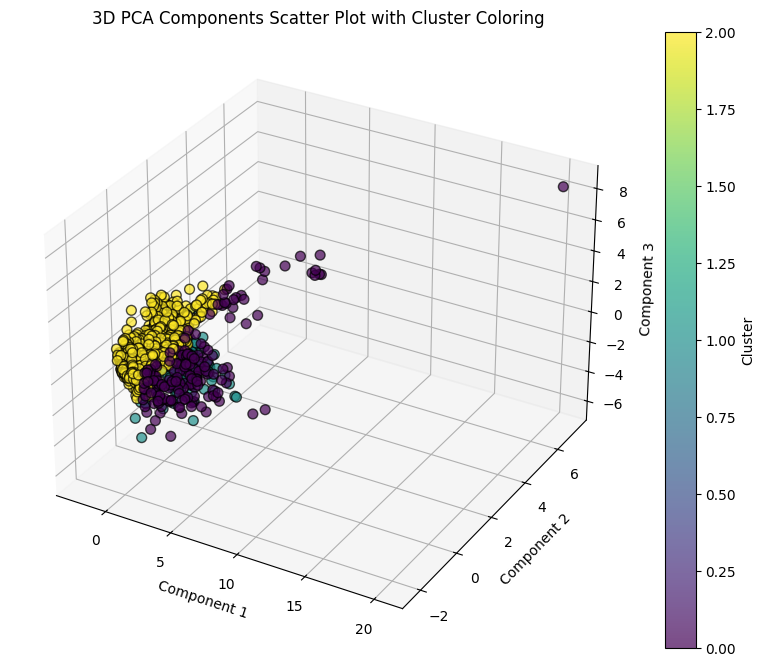

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
import numpy as np
import pandas as pd

# Load your data here
# data = pd.read_csv('path_to_your_data.csv')

# Assuming 'data' is loaded and contains the relevant columns
columns = ['installed_year', 'pc85th_kmh', 'volume_12h', 'volume_24h', 'comm_vhcl', 'peakvol']
data_selected = traffic_data[columns]  # Ensure data is defined and loaded

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# Applying PCA to reduce the dimensions to 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['Component 1', 'Component 2', 'Component 3'])

# Perform K-means clustering on the PCA results
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(pca_df)

# Adding the cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

# Scatter plot of PCA components with cluster coloring in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['Component 1'], pca_df['Component 2'], pca_df['Component 3'], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)
plt.colorbar(scatter, label='Cluster')
ax.set_title('3D PCA Components Scatter Plot with Cluster Coloring')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.grid(True)
plt.show()


In [14]:
# Compute Explained Variance Ratio for PCA
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.39758753, 0.21308865, 0.18936926])

Explained Variance Ratio for each of the three principal components:
1. Component 1: 39.76%
2. Component 2: 21.31%
3. Component 3: 18.94%
. Together, these components explain about 80% of the total variance in the dataset.